# 1. Check images, background subtraction, and calculate variance images
<font size="4">For this tutorial, we will use 12 bands imaging data (from GALEX, SDSS, 2MASS, and WISE) and IFS data from CALIFA. The target galaxy is NGC 309. Data are downloaded from the following websites:
- GALEX: __[link](http://galex.stsci.edu/GR6/?page=tilelist&survey=allsurveys&showall=Y)__
- SDSS: __[link](https://skyserver.sdss.org/dr12/en/tools/explore/Summary.aspx?)__
- 2MASS: __[link](https://irsa.ipac.caltech.edu/applications/2MASS/IM/interactive.html)__
- WISE: __[link](https://irsa.ipac.caltech.edu/applications/wise/)__
- CALIFA: __[link](https://califa.caha.es/?q=content/califa-3rd-data-release)__
</font>

In [1]:
import numpy as np
from astropy.io import fits
import os, sys
import matplotlib.pyplot as plt
from astropy.wcs import WCS

global PIXEDFIT_HOME
PIXEDFIT_HOME = os.environ['PIXEDFIT_HOME']
sys.path.insert(0, PIXEDFIT_HOME)

%matplotlib inline

## Names of filters in piXedfit
<font size="4"> Before going to image processing, it is important to know that **piXedfit** has its own naming convention for photometric filters. The list of filters incorporated in **piXedfit** can be check using `piXedfit.utils.filtering.list_filters` function. </font>

In [2]:
from piXedfit.utils.filtering import list_filters

list_filters()

['hst_acs_f435w',
 'hst_acs_f475w',
 'hst_acs_f555w',
 'hst_acs_f606w',
 'hst_acs_f775w',
 'hst_acs_f814w',
 'hst_acs_f850lp',
 'hst_nicmos_f110w',
 'hst_nicmos_f160w',
 'hst_wfpc2_f300w',
 'hst_wfpc2_f336w',
 'hst_wfpc2_f450w',
 'hst_wfpc2_f555w',
 'hst_wfpc2_f606w',
 'hst_wfpc2_f702w',
 'hst_wfpc2_f814w',
 'hst_wfpc2_f850lp',
 'hst_wfpc3_f105w',
 'hst_wfpc3_f125w',
 'hst_wfpc3_f140w',
 'hst_wfpc3_f160w',
 'hst_wfpc3_f218w',
 'hst_wfpc3_f225w',
 'hst_wfpc3_f275w',
 'hst_wfpc3_f336w',
 'hst_wfpc3_f390w',
 'hst_wfpc3_f438w',
 'hst_wfpc3_f475w',
 'hst_wfpc3_f555w',
 'hst_wfpc3_f606w',
 'hst_wfpc3_f625w',
 'hst_wfpc3_f775w',
 'hst_wfpc3_f814w',
 'galex_fuv',
 'galex_nuv',
 'sdss_u',
 'sdss_g',
 'sdss_r',
 'sdss_i',
 'sdss_z',
 '2mass_j',
 '2mass_h',
 '2mass_k',
 'spitzer_irac_36',
 'spitzer_irac_45',
 'spitzer_irac_58',
 'spitzer_irac_80',
 'spitzer_mips_24',
 'spitzer_mips_70',
 'spitzer_mips_160',
 'cfht_mega_u',
 'cfht_mega_g',
 'cfht_mega_r',
 'cfht_mega_i',
 'cfht_mega_z',
 'cfht_wir

<font size="4"> For our current analysis, the set of photometric filters are below

filters = ['galex_fuv', 'galex_nuv', 'sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 
           'sdss_z', '2mass_j', '2mass_h', '2mass_k', 'wise_w1', 'wise_w2']
</font>

## Galaxy's coordinate and redshift

In [3]:
gal_ra = 14.177751925               
gal_dec = -9.913864294
gal_z = 0.0188977

## 1.1. GALEX
<font size="4"> GALEX images are background-free, so we only need to derive variance (i.e. square of uncertainty) images.</font>

### 1.1.1.  GALEX/FUV

/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


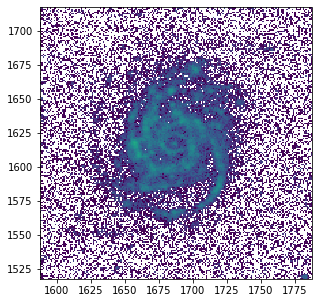

In [4]:
%matplotlib inline

hdu = fits.open("GI1_009100_NGC0309-fd-intbgsub.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()

plt.figure(figsize=(5,5))
plt.xlim(gal_x-100,gal_x+100)
plt.ylim(gal_y-100,gal_y+100)
plt.imshow(np.log10(data_image), origin='lower')

<font size="4"> Calculate variance image using `piXedfit.piXedfit_images.var_img_GALEX`
</font>

In [5]:
from piXedfit.piXedfit_images import var_img_GALEX

sci_img = "GI1_009100_NGC0309-fd-intbgsub.fits"
skybg_img = "GI1_009100_NGC0309-fd-skybg.fits"
var_img_GALEX(filter_name='galex_fuv', sci_img=sci_img, skybg_img=skybg_img)

'var_GI1_009100_NGC0309-fd-intbgsub.fits'

### 1.1.2. GALEX/NUV

/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


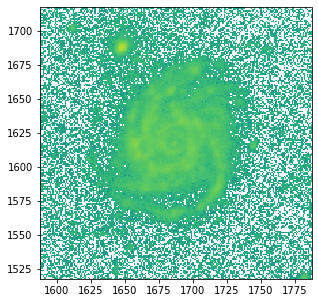

In [6]:
hdu = fits.open("GI1_009100_NGC0309-nd-intbgsub.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()

plt.figure(figsize=(5,5))
plt.xlim(gal_x-100,gal_x+100)
plt.ylim(gal_y-100,gal_y+100)
plt.imshow(np.log10(data_image), origin='lower')

In [7]:
sci_img = "GI1_009100_NGC0309-nd-intbgsub.fits"
skybg_img = "GI1_009100_NGC0309-nd-skybg.fits"
var_img_GALEX(filter_name='galex_nuv', sci_img=sci_img, skybg_img=skybg_img)

'var_GI1_009100_NGC0309-nd-intbgsub.fits'

## 1.2. SDSS
<font size="4"> SDSS images are background-free, so we only need to calculate variance images. It can be done using `piXedfit.piXedfit_images.var_img_sdss` function. </font>

### 1.2.1. SDSS/u

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


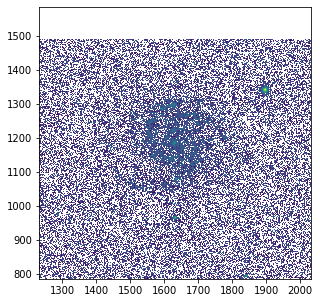

In [8]:
# check image
hdu = fits.open("frame-u-001740-3-0115.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()

plt.figure(figsize=(5,5))
plt.xlim(gal_x-400,gal_x+400)
plt.ylim(gal_y-400,gal_y+400)
plt.imshow(np.log10(data_image), origin='lower')

In [9]:
from piXedfit.piXedfit_images import var_img_sdss

fits_image = "frame-u-001740-3-0115.fits"
var_img_sdss(fits_image=fits_image, filter_name='sdss_u')

'var_frame-u-001740-3-0115.fits'

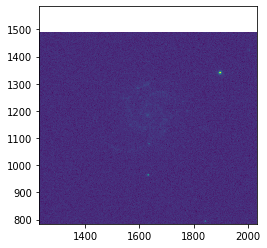

In [10]:
# check image
hdu = fits.open("var_frame-u-001740-3-0115.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()

plt.figure(figsize=(4,4))
plt.xlim(gal_x-400,gal_x+400)
plt.ylim(gal_y-400,gal_y+400)
plt.imshow(np.log10(data_image), origin='lower')

### 1.2.2. SDSS/g

/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


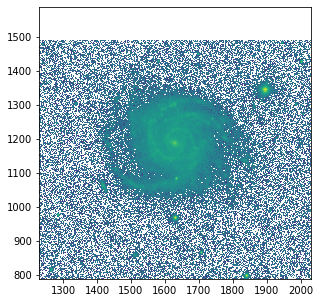

In [11]:
# check image
hdu = fits.open("frame-g-001740-3-0115.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()

plt.figure(figsize=(5,5))
plt.xlim(gal_x-400,gal_x+400)
plt.ylim(gal_y-400,gal_y+400)
plt.imshow(np.log10(data_image), origin='lower')

In [12]:
fits_image = "frame-g-001740-3-0115.fits"
var_img_sdss(fits_image=fits_image, filter_name='sdss_g')

'var_frame-g-001740-3-0115.fits'

### 1.2.3. SDSS/r

/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


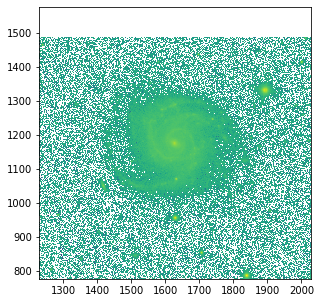

In [13]:
# check image
hdu = fits.open("frame-r-001740-3-0115.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()

plt.figure(figsize=(5,5))
plt.xlim(gal_x-400,gal_x+400)
plt.ylim(gal_y-400,gal_y+400)
plt.imshow(np.log10(data_image), origin='lower')

In [14]:
fits_image = "frame-r-001740-3-0115.fits"
var_img_sdss(fits_image=fits_image, filter_name='sdss_r')

'var_frame-r-001740-3-0115.fits'

### 1.2.4. SDSS/i

/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


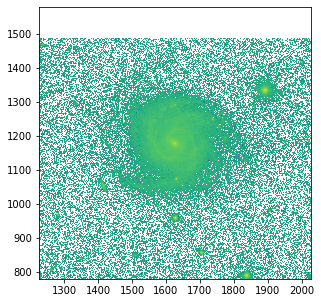

In [15]:
# check image
hdu = fits.open("frame-i-001740-3-0115.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()

plt.figure(figsize=(5,5))
plt.xlim(gal_x-400,gal_x+400)
plt.ylim(gal_y-400,gal_y+400)
plt.imshow(np.log10(data_image), origin='lower')

In [16]:
fits_image = "frame-i-001740-3-0115.fits"
var_img_sdss(fits_image=fits_image, filter_name='sdss_i')

'var_frame-i-001740-3-0115.fits'

### 1.2.5. SDSS/z

/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


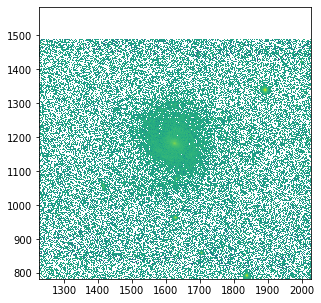

In [17]:
# check image
hdu = fits.open("frame-z-001740-3-0115.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()

plt.figure(figsize=(5,5))
plt.xlim(gal_x-400,gal_x+400)
plt.ylim(gal_y-400,gal_y+400)
plt.imshow(np.log10(data_image), origin='lower')

In [18]:
fits_image = "frame-z-001740-3-0115.fits"
var_img_sdss(fits_image=fits_image, filter_name='sdss_z')

'var_frame-z-001740-3-0115.fits'

## 1.3. 2MASS

<font size="4"> 2MASS images are not background-free, so we need to perform background-subtraction before deriving variance images. Background subtraction can be performed using `piXedfit.piXedfit_images.subtract_background`, while variance images can be calculated using `piXedfit.piXedfit_images.var_img_2MASS`.</font>

### 1.3.1. 2MASS/J

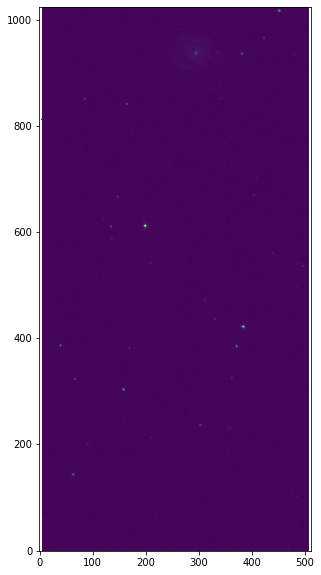

In [19]:
# check image
hdu = fits.open("aJ_asky_001022s0620186.fits")
data_image = hdu[0].data
hdu.close()

plt.figure(figsize=(5,10))
#plt.xlim(gal_x-400,gal_x+400)
#plt.ylim(gal_y-400,gal_y+400)
plt.imshow(np.log10(data_image), origin='lower')

<font size="4"> Background subtraction

In [20]:
from piXedfit.piXedfit_images import subtract_background

fits_image = "aJ_asky_001022s0620186.fits"
subtract_background(fits_image=fits_image, sigma=3.0, box_size=[100,100], 
                    mask_sextractor_sources=True, detect_thresh=5.0, detect_minarea=300)

INFO: sewpy.sewpy(__init__): SExtractor version is 2.8.6
INFO: sewpy.sewpy(__call__): Preparing to run SExtractor on aJ_asky_001022s0620186.fits...
DEBUG: sewpy.sewpy(__call__): Using imgname 'aJ_asky_001022s0620186'...
DEBUG: sewpy.sewpy(_write_default_config): Wrote /tmp/sewpy_workdir_844cdkyc/config.txt
DEBUG: sewpy.sewpy(_write_params): Wrote /tmp/sewpy_workdir_844cdkyc/params.txt
DEBUG: sewpy.sewpy(_write_default_conv): Wrote /tmp/sewpy_workdir_844cdkyc/conv.txt
DEBUG: sewpy.sewpy(_write_default_psf): Wrote /tmp/sewpy_workdir_844cdkyc/default.psf
INFO: sewpy.sewpy(__call__): Starting SExtractor now, with niceness None...
DEBUG: sewpy.sewpy(__call__): Running with command ['sex', 'aJ_asky_001022s0620186.fits', '-c', '/tmp/sewpy_workdir_844cdkyc/config.txt', '-DETECT_THRESH', '5.0', '-DETECT_MINAREA', '300', '-DEBLEND_NTHRESH', '32.0', '-DEBLEND_MINCONT', '0.005', '-CHECKIMAGE_TYPE', 'SEGMENTATION', '-CHECKIMAGE_NAME', 'segm_temp.fits', '-PARAMETERS_NAME', '/tmp/sewpy_workdir_844cdk

produce skybg_aJ_asky_001022s0620186.fits
produce skybgrms_aJ_asky_001022s0620186.fits
produce skybgsub_aJ_asky_001022s0620186.fits


/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10


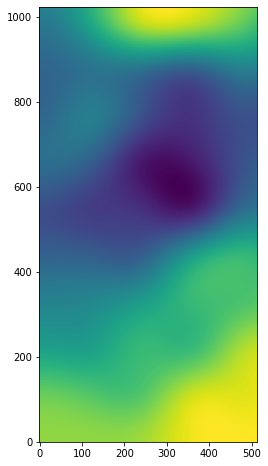

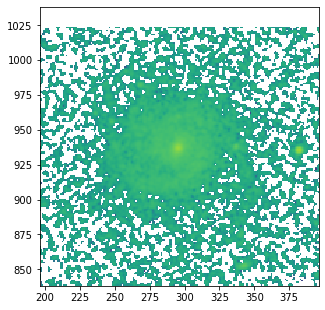

In [21]:
# check background image
hdu = fits.open("skybg_aJ_asky_001022s0620186.fits")
data_image = hdu[0].data
hdu.close()
plt.figure(figsize=(5,8))
#plt.xlim(gal_x-400,gal_x+400)
#plt.ylim(gal_y-400,gal_y+400)
plt.imshow(np.log10(data_image), origin='lower')
#plt.colorbar()

# check background-subtracted image
hdu = fits.open("skybgsub_aJ_asky_001022s0620186.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()
plt.figure(figsize=(5,8))
plt.xlim(gal_x-100,gal_x+100)
plt.ylim(gal_y-100,gal_y+100)
plt.imshow(np.log10(data_image), origin='lower')
#plt.colorbar()

<font size="4"> Calculate variance image

In [22]:
from piXedfit.piXedfit_images import var_img_2MASS

sci_img = "skybgsub_aJ_asky_001022s0620186.fits"
skyrms_img = "skybgrms_aJ_asky_001022s0620186.fits"
var_img_2MASS(sci_img=sci_img, skyrms_img=skyrms_img)

'var_skybgsub_aJ_asky_001022s0620186.fits'

/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10
DEBUG: matplotlib.colorbar(_get_ticker_locator_formatter): locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fd2b7ad2400>
DEBUG: matplotlib.colorbar(update_ticks): Using auto colorbar locator on colorbar
DEBUG: matplotlib.colorbar(update_ticks): locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fd2b7ad2400>
DEBUG: matplotlib.colorbar(_add_solids): Setting pcolormesh


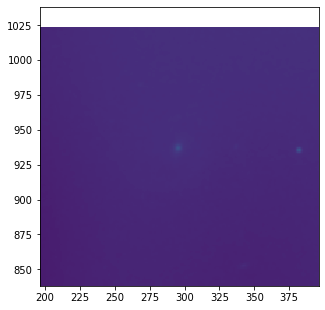

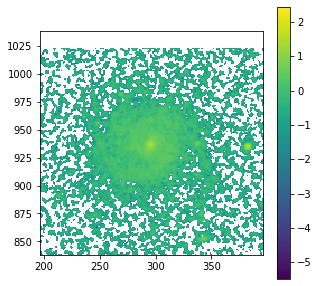

In [23]:
# Check result
hdu = fits.open("skybgsub_aJ_asky_001022s0620186.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()


hdu = fits.open("var_skybgsub_aJ_asky_001022s0620186.fits")
data_image_var = hdu[0].data
hdu.close()


plt.figure(figsize=(5,8))
plt.xlim(gal_x-100,gal_x+100)
plt.ylim(gal_y-100,gal_y+100)
plt.imshow(np.log10(data_image_var), origin='lower')
#plt.colorbar()

## Check S/N map
plt.figure(figsize=(5,5))
plt.xlim(gal_x-100,gal_x+100)
plt.ylim(gal_y-100,gal_y+100)
plt.imshow(np.log10(data_image/np.sqrt(data_image_var)), origin='lower')
plt.colorbar()

### 1.3.2. 2MASS/H

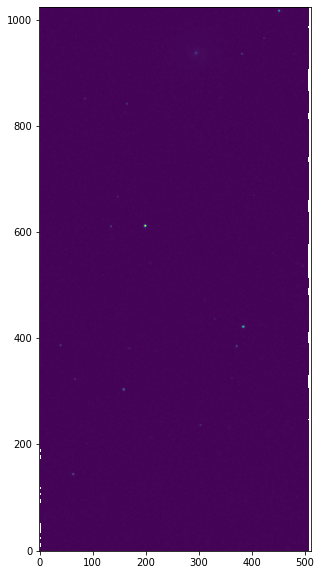

In [24]:
# check image
hdu = fits.open("aH_asky_001022s0620186.fits")
data_image = hdu[0].data
hdu.close()

plt.figure(figsize=(5,10))
#plt.xlim(gal_x-400,gal_x+400)
#plt.ylim(gal_y-400,gal_y+400)
plt.imshow(np.log10(data_image), origin='lower')

<font size="4"> Background subtraction

In [25]:
fits_image = "aH_asky_001022s0620186.fits"
subtract_background(fits_image=fits_image, sigma=3.0, box_size=[100,100], 
                    mask_sextractor_sources=True, detect_thresh=5.0, 
                    detect_minarea=300)

INFO: sewpy.sewpy(__init__): SExtractor version is 2.8.6
INFO: sewpy.sewpy(__call__): Preparing to run SExtractor on aH_asky_001022s0620186.fits...
DEBUG: sewpy.sewpy(__call__): Using imgname 'aH_asky_001022s0620186'...
DEBUG: sewpy.sewpy(_write_default_config): Wrote /tmp/sewpy_workdir_kha6zqcz/config.txt
DEBUG: sewpy.sewpy(_write_params): Wrote /tmp/sewpy_workdir_kha6zqcz/params.txt
DEBUG: sewpy.sewpy(_write_default_conv): Wrote /tmp/sewpy_workdir_kha6zqcz/conv.txt
DEBUG: sewpy.sewpy(_write_default_psf): Wrote /tmp/sewpy_workdir_kha6zqcz/default.psf
INFO: sewpy.sewpy(__call__): Starting SExtractor now, with niceness None...
DEBUG: sewpy.sewpy(__call__): Running with command ['sex', 'aH_asky_001022s0620186.fits', '-c', '/tmp/sewpy_workdir_kha6zqcz/config.txt', '-DETECT_THRESH', '5.0', '-DETECT_MINAREA', '300', '-DEBLEND_NTHRESH', '32.0', '-DEBLEND_MINCONT', '0.005', '-CHECKIMAGE_TYPE', 'SEGMENTATION', '-CHECKIMAGE_NAME', 'segm_temp.fits', '-PARAMETERS_NAME', '/tmp/sewpy_workdir_kha6zq

produce skybg_aH_asky_001022s0620186.fits
produce skybgrms_aH_asky_001022s0620186.fits
produce skybgsub_aH_asky_001022s0620186.fits


/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


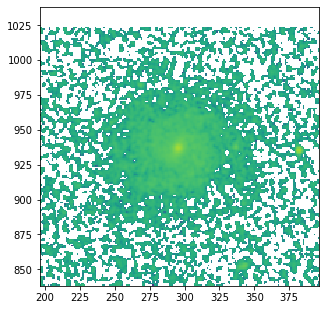

In [26]:
# check background-subtracted image
hdu = fits.open("skybgsub_aH_asky_001022s0620186.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()
plt.figure(figsize=(5,8))
plt.xlim(gal_x-100,gal_x+100)
plt.ylim(gal_y-100,gal_y+100)
plt.imshow(np.log10(data_image), origin='lower')
#plt.colorbar()

<font size="4"> Calculate variance image

In [27]:
sci_img = "skybgsub_aH_asky_001022s0620186.fits"
skyrms_img = "skybgrms_aH_asky_001022s0620186.fits"
var_img_2MASS(sci_img=sci_img, skyrms_img=skyrms_img)

'var_skybgsub_aH_asky_001022s0620186.fits'

### 1.3.3. 2MASS/Ks

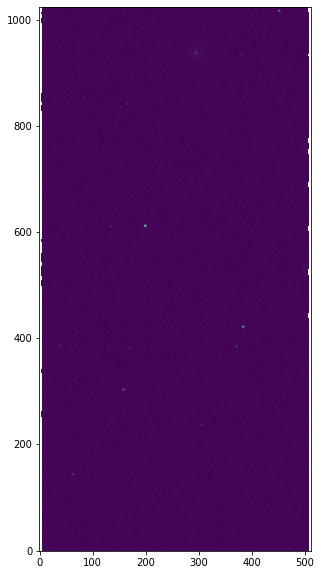

In [28]:
# check image
hdu = fits.open("aK_asky_001022s0620186.fits")
data_image = hdu[0].data
hdu.close()

plt.figure(figsize=(5,10))
#plt.xlim(gal_x-400,gal_x+400)
#plt.ylim(gal_y-400,gal_y+400)
plt.imshow(np.log10(data_image), origin='lower')

<font size="4"> Background subtraction

In [29]:
fits_image = "aK_asky_001022s0620186.fits"
subtract_background(fits_image=fits_image, sigma=3.0, box_size=[100,100], 
                    mask_sextractor_sources=True, detect_thresh=5.0, detect_minarea=300)

INFO: sewpy.sewpy(__init__): SExtractor version is 2.8.6
INFO: sewpy.sewpy(__call__): Preparing to run SExtractor on aK_asky_001022s0620186.fits...
DEBUG: sewpy.sewpy(__call__): Using imgname 'aK_asky_001022s0620186'...
DEBUG: sewpy.sewpy(_write_default_config): Wrote /tmp/sewpy_workdir_fvobj0gg/config.txt
DEBUG: sewpy.sewpy(_write_params): Wrote /tmp/sewpy_workdir_fvobj0gg/params.txt
DEBUG: sewpy.sewpy(_write_default_conv): Wrote /tmp/sewpy_workdir_fvobj0gg/conv.txt
DEBUG: sewpy.sewpy(_write_default_psf): Wrote /tmp/sewpy_workdir_fvobj0gg/default.psf
INFO: sewpy.sewpy(__call__): Starting SExtractor now, with niceness None...
DEBUG: sewpy.sewpy(__call__): Running with command ['sex', 'aK_asky_001022s0620186.fits', '-c', '/tmp/sewpy_workdir_fvobj0gg/config.txt', '-DETECT_THRESH', '5.0', '-DETECT_MINAREA', '300', '-DEBLEND_NTHRESH', '32.0', '-DEBLEND_MINCONT', '0.005', '-CHECKIMAGE_TYPE', 'SEGMENTATION', '-CHECKIMAGE_NAME', 'segm_temp.fits', '-PARAMETERS_NAME', '/tmp/sewpy_workdir_fvobj0

produce skybg_aK_asky_001022s0620186.fits
produce skybgrms_aK_asky_001022s0620186.fits
produce skybgsub_aK_asky_001022s0620186.fits


/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


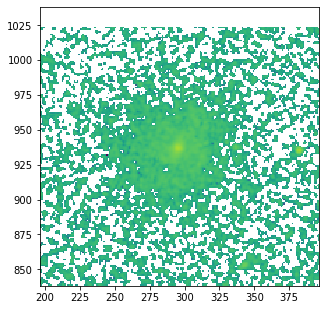

In [30]:
# check background-subtracted image
hdu = fits.open("skybgsub_aK_asky_001022s0620186.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()
plt.figure(figsize=(5,8))
plt.xlim(gal_x-100,gal_x+100)
plt.ylim(gal_y-100,gal_y+100)
plt.imshow(np.log10(data_image), origin='lower')
#plt.colorbar()

<font size="4"> Derive variance image

In [31]:
sci_img = "skybgsub_aK_asky_001022s0620186.fits"
skyrms_img = "skybgrms_aK_asky_001022s0620186.fits"
var_img_2MASS(sci_img=sci_img, skyrms_img=skyrms_img)

'var_skybgsub_aK_asky_001022s0620186.fits'

## 1.4. WISE

<font size="4"> WISE images are not background-free, so we need to perform background-subtraction before deriving variance images. Background subtraction can be performed using `piXedfit.piXedfit_images.subtract_background`, while variance images can be calculated using `piXedfit.piXedfit_images.var_img_WISE`.</font>

### 1.4.1. WISE/W1

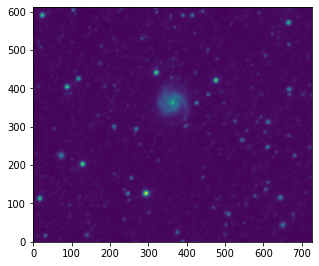

In [32]:
# check image
hdu = fits.open("0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits")
data_image = hdu[0].data
hdu.close()

plt.figure(figsize=(5,10))
#plt.xlim(gal_x-400,gal_x+400)
#plt.ylim(gal_y-400,gal_y+400)
plt.imshow(np.log10(data_image), origin='lower')

<font size="4"> Background subtraction

In [33]:
fits_image = "0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits"
subtract_background(fits_image=fits_image, sigma=3.0, box_size=[100,100], 
                    mask_sextractor_sources=True, detect_thresh=3.0, 
                    detect_minarea=200)

INFO: sewpy.sewpy(__init__): SExtractor version is 2.8.6
INFO: sewpy.sewpy(__call__): Preparing to run SExtractor on 0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits...
DEBUG: sewpy.sewpy(__call__): Using imgname '0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000'...
DEBUG: sewpy.sewpy(_write_default_config): Wrote /tmp/sewpy_workdir_mmtvhc66/config.txt
DEBUG: sewpy.sewpy(_write_params): Wrote /tmp/sewpy_workdir_mmtvhc66/params.txt
DEBUG: sewpy.sewpy(_write_default_conv): Wrote /tmp/sewpy_workdir_mmtvhc66/conv.txt
DEBUG: sewpy.sewpy(_write_default_psf): Wrote /tmp/sewpy_workdir_mmtvhc66/default.psf
INFO: sewpy.sewpy(__call__): Starting SExtractor now, with niceness None...
DEBUG: sewpy.sewpy(__call__): Running with command ['sex', '0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits', '-c', '/tmp/sewpy_workdir_mmtvhc66/config.txt', '-DETECT_THRESH', '3.0', '-DETECT_MINAREA', '200', '-DEBLEND_NTHRESH', '32.0', '-DEBLEND_MINCONT

produce skybg_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits
produce skybgrms_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits
produce skybgsub_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits


/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log10


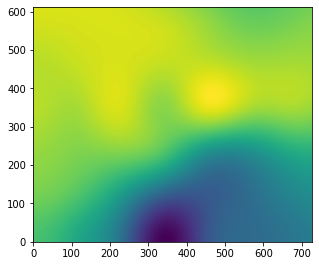

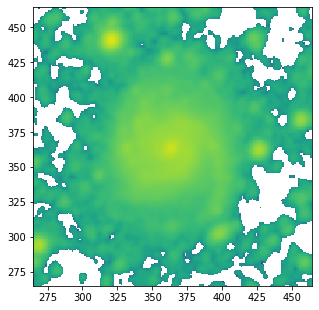

In [34]:
# check background image
hdu = fits.open("skybg_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits")
data_image = hdu[0].data
hdu.close()
plt.figure(figsize=(5,8))
plt.imshow(np.log10(data_image), origin='lower')
#plt.colorbar()

# check background-subtracted image
hdu = fits.open("skybgsub_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()
plt.figure(figsize=(5,8))
plt.xlim(gal_x-100,gal_x+100)
plt.ylim(gal_y-100,gal_y+100)
plt.imshow(np.log10(data_image), origin='lower')
#plt.colorbar()

<font size="4"> Derive variance image

In [35]:
from piXedfit.piXedfit_images import var_img_WISE

sci_img = "skybgsub_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits"
unc_img = "0138m107_ac51-w1-unc-3_ra14.177751925_dec-9.913864294_asec1000.000.fits"
skyrms_img = "skybgrms_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits"
var_img_WISE(filter_name='wise_w1', sci_img=sci_img, unc_img=unc_img, 
             skyrms_img=skyrms_img)

'var_0138m107_ac51-w1-unc-3_ra14.177751925_dec-9.913864294_asec1000.000.fits'

### 1.4.2. WISE/W2

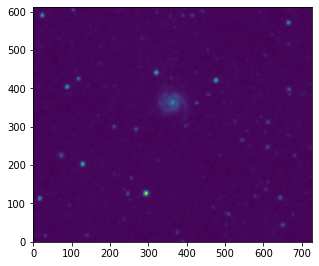

In [36]:
# check image
hdu = fits.open("0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits")
data_image = hdu[0].data
hdu.close()

plt.figure(figsize=(5,10))
#plt.xlim(gal_x-400,gal_x+400)
#plt.ylim(gal_y-400,gal_y+400)
plt.imshow(np.log10(data_image), origin='lower')

<font size="4"> Background subtraction

In [37]:
fits_image = "0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits" 
subtract_background(fits_image=fits_image, sigma=3.0, box_size=[100,100], 
                    mask_sextractor_sources=True, detect_thresh=3.0, 
                    detect_minarea=200)

INFO: sewpy.sewpy(__init__): SExtractor version is 2.8.6
INFO: sewpy.sewpy(__call__): Preparing to run SExtractor on 0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits...
DEBUG: sewpy.sewpy(__call__): Using imgname '0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000'...
DEBUG: sewpy.sewpy(_write_default_config): Wrote /tmp/sewpy_workdir_d_qjuui_/config.txt
DEBUG: sewpy.sewpy(_write_params): Wrote /tmp/sewpy_workdir_d_qjuui_/params.txt
DEBUG: sewpy.sewpy(_write_default_conv): Wrote /tmp/sewpy_workdir_d_qjuui_/conv.txt
DEBUG: sewpy.sewpy(_write_default_psf): Wrote /tmp/sewpy_workdir_d_qjuui_/default.psf
INFO: sewpy.sewpy(__call__): Starting SExtractor now, with niceness None...
DEBUG: sewpy.sewpy(__call__): Running with command ['sex', '0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits', '-c', '/tmp/sewpy_workdir_d_qjuui_/config.txt', '-DETECT_THRESH', '3.0', '-DETECT_MINAREA', '200', '-DEBLEND_NTHRESH', '32.0', '-DEBLEND_MINCONT

produce skybg_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits
produce skybgrms_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits
produce skybgsub_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits


/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log10


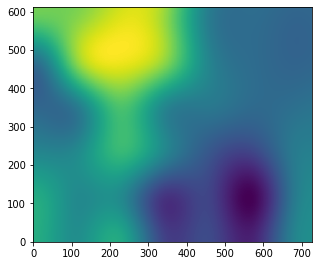

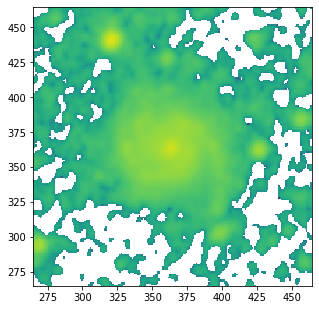

In [38]:
# check background image
hdu = fits.open("skybg_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits")
data_image = hdu[0].data
hdu.close()
plt.figure(figsize=(5,8))
plt.imshow(np.log10(data_image), origin='lower')
#plt.colorbar()

# check background-subtracted image
hdu = fits.open("skybgsub_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits")
data_image = hdu[0].data
wcs = WCS(hdu[0].header)
gal_x, gal_y = wcs.wcs_world2pix(gal_ra, gal_dec, 1)
hdu.close()
plt.figure(figsize=(5,8))
plt.xlim(gal_x-100,gal_x+100)
plt.ylim(gal_y-100,gal_y+100)
plt.imshow(np.log10(data_image), origin='lower')
#plt.colorbar()

<font size="4"> Derive variance image

In [39]:
sci_img = "skybgsub_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits"
unc_img = "0138m107_ac51-w2-unc-3_ra14.177751925_dec-9.913864294_asec1000.000.fits"
skyrms_img = "skybgrms_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits"
var_img_WISE(filter_name='wise_w2', sci_img=sci_img, unc_img=unc_img, 
             skyrms_img=skyrms_img)

'var_0138m107_ac51-w2-unc-3_ra14.177751925_dec-9.913864294_asec1000.000.fits'